In [1]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

import DeepINN as dp

Using default backend: PyTorch
Using Pytorch:  2.0.1+cu117


In [2]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [0,0], [1,0], [0,1]) # unit square
C = dp.domains.Circle(X, [0,0], 1) # unit circle

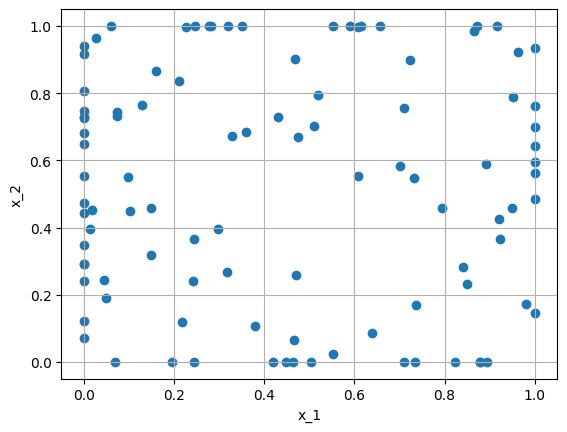

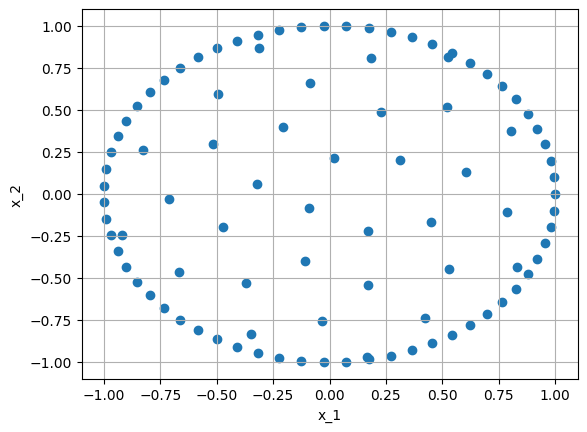

In [3]:
random_R = dp.samplers.RandomUniformSampler(R, n_points=50) + dp.samplers.RandomUniformSampler(R.boundary, n_points=50) # 50 random points
grid_C = dp.samplers.GridSampler(C, density=10) + dp.samplers.GridSampler(C.boundary, density=10) # grid points with density 10

dp.utils.scatter(X, random_R)
dp.utils.scatter(X, grid_C)

/home/hell/Desktop/repos/DeepINN/Tutorials/1. Geometry/../../DeepINN/geometry/domains/domainoperations/sampler_helper.py:50: UserWarning: Will sample random points in the created domain operation, with
                     a for loop over all input parameters, in total: 1
                     This may slow down the training.
  warnings.warn(f"""Will sample random points in the created domain operation, with
/home/hell/Desktop/repos/DeepINN/Tutorials/1. Geometry/../../DeepINN/geometry/domains/domainoperations/sampler_helper.py:163: UserWarning: Will sample random points in the created domain operation, with
                     a for loop over all input parameters, in total: 1
                     This may slow down the training.
  warnings.warn(f"""Will sample random points in the created domain operation, with
/home/hell/Desktop/repos/DeepINN/Tutorials/1. Geometry/../../DeepINN/geometry/domains/domainoperations/cut.py:107: UserWarning: Exact volume of this domain boundary is not known

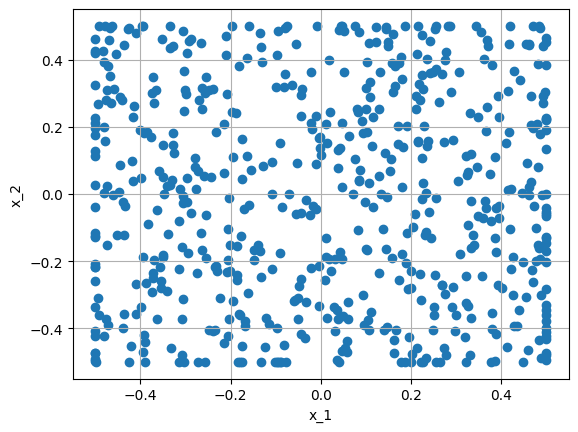

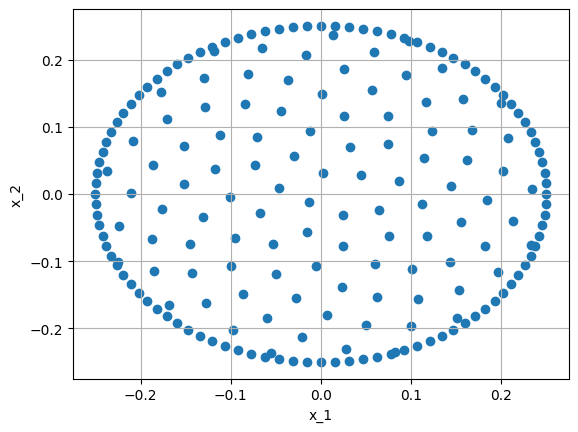

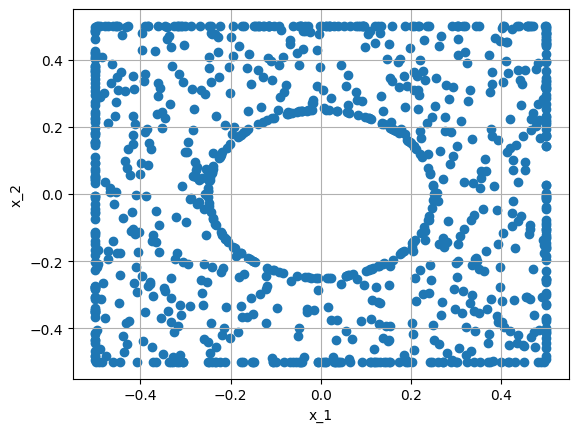

In [4]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [-0.5,-0.5], [0.5,-0.5], [-0.5,0.5]) # unit square
C = dp.domains.Circle(X, [0,0], 0.25) # unit circle

intersect = R - C
random_R = dp.samplers.RandomUniformSampler(R, n_points=500) + dp.samplers.RandomUniformSampler(R.boundary, n_points=100) # 50 random points
grid_C = dp.samplers.GridSampler(C, n_points=100) + dp.samplers.GridSampler(C.boundary, n_points=100) # grid points with density 10

random_intersect = dp.samplers.LHSSampler(intersect, n_points=500) + dp.samplers.RandomUniformSampler(intersect.boundary, n_points=500) 

dp.utils.scatter(X, random_R)
dp.utils.scatter(X, grid_C)
dp.utils.scatter(X, random_intersect)

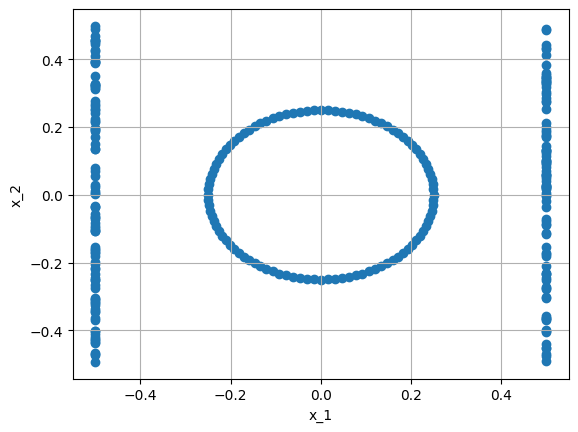

In [16]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [-0.5,-0.5], [0.5,-0.5], [-0.5,0.5]) # unit square
C = dp.domains.Circle(X, [0,0], 0.25) # unit circle


right_boundary =  dp.samplers.RandomUniformSampler(R.boundary, n_points=100, filter_fn=lambda x: x[:,0]==0.5)
left_boundary =  dp.samplers.RandomUniformSampler(R.boundary, n_points=100, filter_fn=lambda x: x[:,0]==-0.5)

grid_C = dp.samplers.GridSampler(C.boundary, n_points=100)

boundary = right_boundary + left_boundary + grid_C
dp.utils.scatter(X, boundary)


In [17]:
import torch

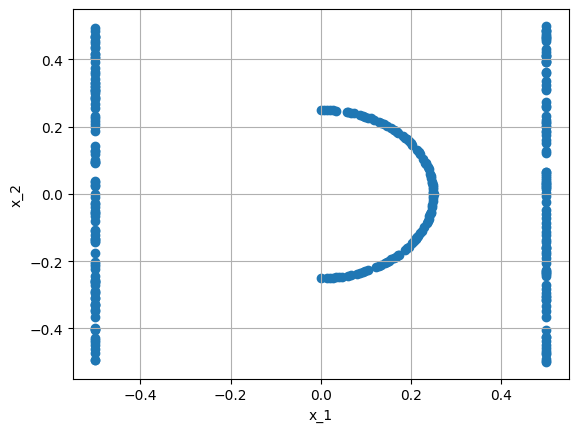

In [18]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [-0.5,-0.5], [0.5,-0.5], [-0.5,0.5]) # unit square
C = dp.domains.Circle(X, [0,0], 0.25) # unit circle


right_boundary =  dp.samplers.RandomUniformSampler(R.boundary, n_points=100, filter_fn=lambda x: x[:,0]==0.5)
left_boundary =  dp.samplers.RandomUniformSampler(R.boundary, n_points=100, filter_fn=lambda x: x[:,0]==-0.5)

grid_C = dp.samplers.GridSampler(C.boundary, n_points=100, filter_fn=lambda x: (torch.sign(x[:,0])*x[:,0]**2 + x[:,1]**2)==0.25**(2))

boundary = right_boundary + left_boundary + grid_C
dp.utils.scatter(X, boundary)


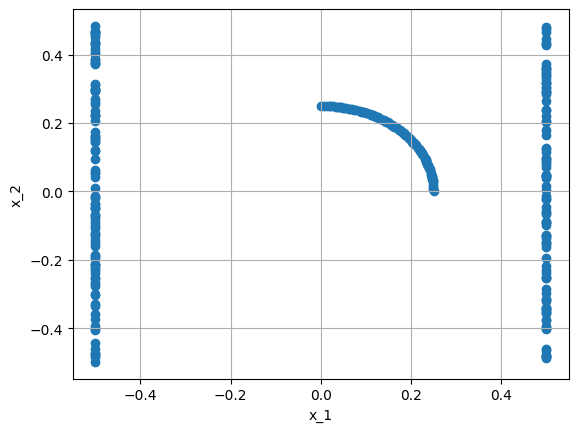

In [19]:
X = dp.spaces.R2('x') # R2 space
R = dp.domains.Parallelogram(X, [-0.5,-0.5], [0.5,-0.5], [-0.5,0.5]) # unit square
C = dp.domains.Circle(X, [0,0], 0.25) # unit circle


right_boundary =  dp.samplers.RandomUniformSampler(R.boundary, n_points=100, filter_fn=lambda x: x[:,0]==0.5)
left_boundary =  dp.samplers.RandomUniformSampler(R.boundary, n_points=100, filter_fn=lambda x: x[:,0]==-0.5)

grid_C = dp.samplers.GridSampler(C.boundary, n_points=100, filter_fn=lambda x: (torch.sign(x[:,0])*x[:,0]**2 + torch.sign(x[:,1])*x[:,1]**2)==0.25**(2))

boundary = right_boundary + left_boundary + grid_C
dp.utils.scatter(X, boundary)
